In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
sns.set(style="whitegrid")

In [4]:
#producer_df = pd.read_csv("../data/producer-prices_aut.csv")
#consumer_df = pd.read_csv("../data/consumer-price-indices_aut.csv")
# Re-load the data and skip the first row (it has metadata headers)
producer_df = pd.read_csv("../data/producer-prices_aut.csv")
producer_df = producer_df.iloc[1:]

# Clean datatypes again
producer_df["Year"] = producer_df["Year"].astype(int)
producer_df["Value"] = producer_df["Value"].astype(float)


In [5]:
producer_df = producer_df[["Year" , "Item","Value"]]
#producer_df = producer_df.iloc[1]



In [6]:
producer_df["Year"] = producer_df["Year"].astype(int)
producer_df["Value"] = producer_df["Value"].astype(float)


In [7]:
producer_df.head()

,Year,Item,Value
1,1991,Apples,9620.0
2,1992,Apples,8410.0
3,1993,Apples,6560.0
4,1994,Apples,5460.0
5,1995,Apples,4900.0


In [8]:
product_counts = producer_df["Item"].value_counts()
suspects = product_counts[product_counts > 300].index.tolist()
suspects


['Poppy seed',
 'Barley',
 'Meat of cattle with the bone, fresh or chilled (biological)',
 'Meat of chickens, fresh or chilled (biological)',
 'Raw milk of cattle',
 'Meat of pig with the bone, fresh or chilled (biological)',
 'Meat of sheep, fresh or chilled (biological)',
 'Maize (corn)',
 'Other oil seeds, n.e.c.',
 'Meat of turkeys, fresh or chilled (biological)']

In [9]:
producer_df = producer_df[~producer_df["Item"].isin(suspects)]
producer_df.head()

,Year,Item,Value
1,1991,Apples,9620.0
2,1992,Apples,8410.0
3,1993,Apples,6560.0
4,1994,Apples,5460.0
5,1995,Apples,4900.0


In [10]:
sorted(producer_df["Item"].dropna().unique().tolist())

['Agriculture',
 'Apples',
 'Apricots',
 'Asparagus',
 'Beans, dry',
 'Broad beans and horse beans, dry',
 'Broad beans and horse beans, green',
 'Cabbages',
 'Carrots and turnips',
 'Cauliflowers and broccoli',
 'Cereals n.e.c.',
 'Cereals, primary',
 'Cherries',
 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
 'Coarse Grain, Total',
 'Cucumbers and gherkins',
 'Currants',
 'Eggplants (aubergines)',
 'Eggs Primary',
 'Fruit Primary',
 'Fruit excl Melons, Total',
 'Game meat, fresh, chilled or frozen',
 'Gooseberries',
 'Grapes',
 'Green corn (maize)',
 'Green garlic',
 'Hen eggs in shell, fresh',
 'Hop cones',
 'Horse meat, fresh or chilled',
 'Horse meat, fresh or chilled (biological)',
 'Leeks and other alliaceous vegetables',
 'Lettuce and chicory',
 'Linseed',
 'Livestock',
 'Lupins',
 'Meat of cattle with the bone, fresh or chilled',
 'Meat of chickens, fresh or chilled',
 'Meat of ducks, fresh or chilled',
 'Meat of ducks, fresh or chilled (biological)',
 'Meat 

In [11]:
producer_df["Item"].value_counts()

Item
Wheat                       300
Rye                         280
Potatoes                    277
Oats                        266
Hen eggs in shell, fresh    265
                           ... 
Watermelons                  22
Vetches                      22
Green corn (maize)           22
Lupins                       22
Other pulses n.e.c.          22
Name: count, Length: 92, dtype: int64

In [12]:
top_items = producer_df["Item"].value_counts().head(20).index.tolist()
print(top_items)

['Wheat', 'Rye', 'Potatoes', 'Oats', 'Hen eggs in shell, fresh', 'Triticale', 'Rape or colza seed', 'Natural honey', 'Soya beans', 'Mushrooms and truffles', 'Onions and shallots, dry (excluding dehydrated)', 'Carrots and turnips', 'Apples', 'Beans, dry', 'Sunflower seed', 'Cucumbers and gherkins', 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)', 'Spinach', 'Lettuce and chicory', 'Green garlic']


In [13]:
filtered_df = producer_df[producer_df["Item"].isin(top_items)].copy()
filtered_df.head()
filtered_df.to_csv("normalized_producer_prices.csv", index=False)


In [14]:
print("Top 20 Products:", top_items)
filtered_df.head()


Top 20 Products: ['Wheat', 'Rye', 'Potatoes', 'Oats', 'Hen eggs in shell, fresh', 'Triticale', 'Rape or colza seed', 'Natural honey', 'Soya beans', 'Mushrooms and truffles', 'Onions and shallots, dry (excluding dehydrated)', 'Carrots and turnips', 'Apples', 'Beans, dry', 'Sunflower seed', 'Cucumbers and gherkins', 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)', 'Spinach', 'Lettuce and chicory', 'Green garlic']


,Year,Item,Value
1,1991,Apples,9620.0
2,1992,Apples,8410.0
3,1993,Apples,6560.0
4,1994,Apples,5460.0
5,1995,Apples,4900.0


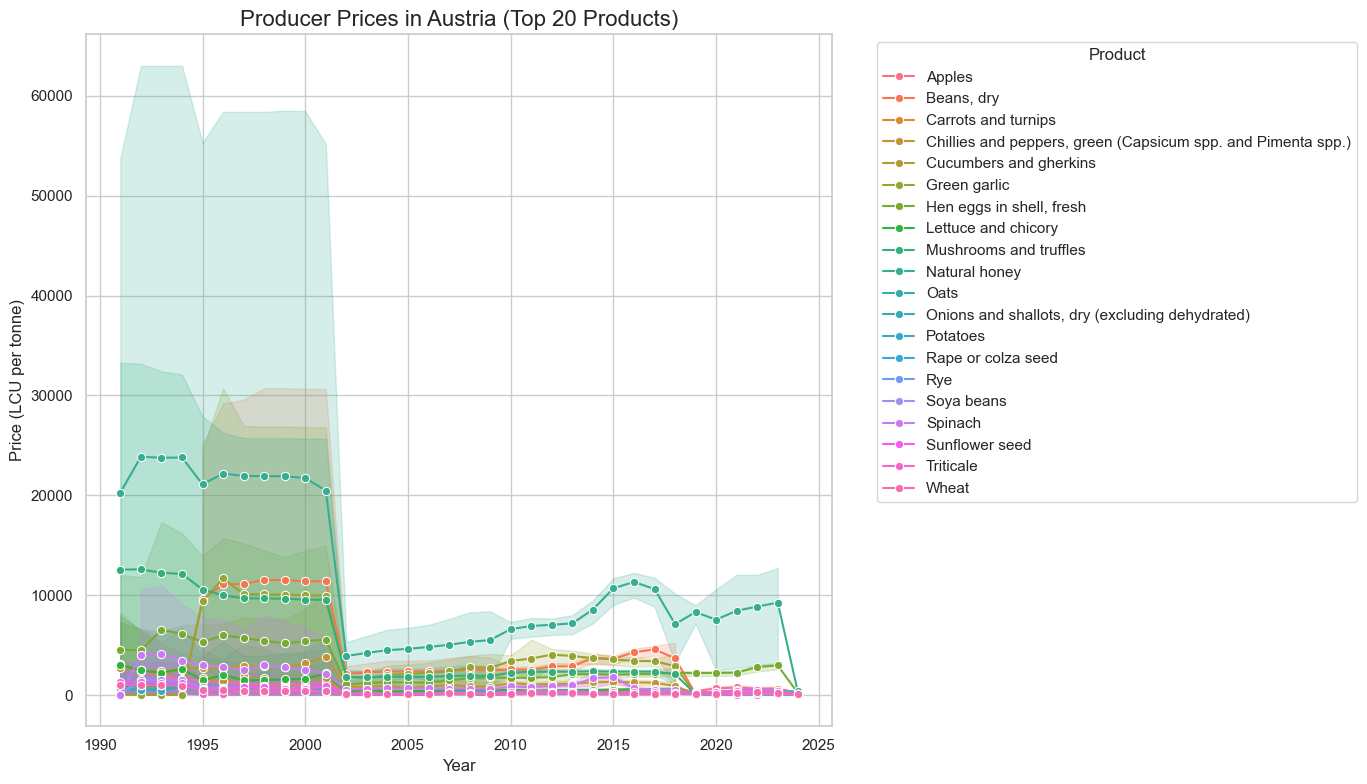

In [15]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_df, x="Year", y="Value", hue="Item", marker="o")

plt.title("Producer Prices in Austria (Top 20 Products)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Price (LCU per tonne)")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the figure
plt.savefig("../visuals/top_20_producer_price_trends.png", dpi=300)

plt.show()


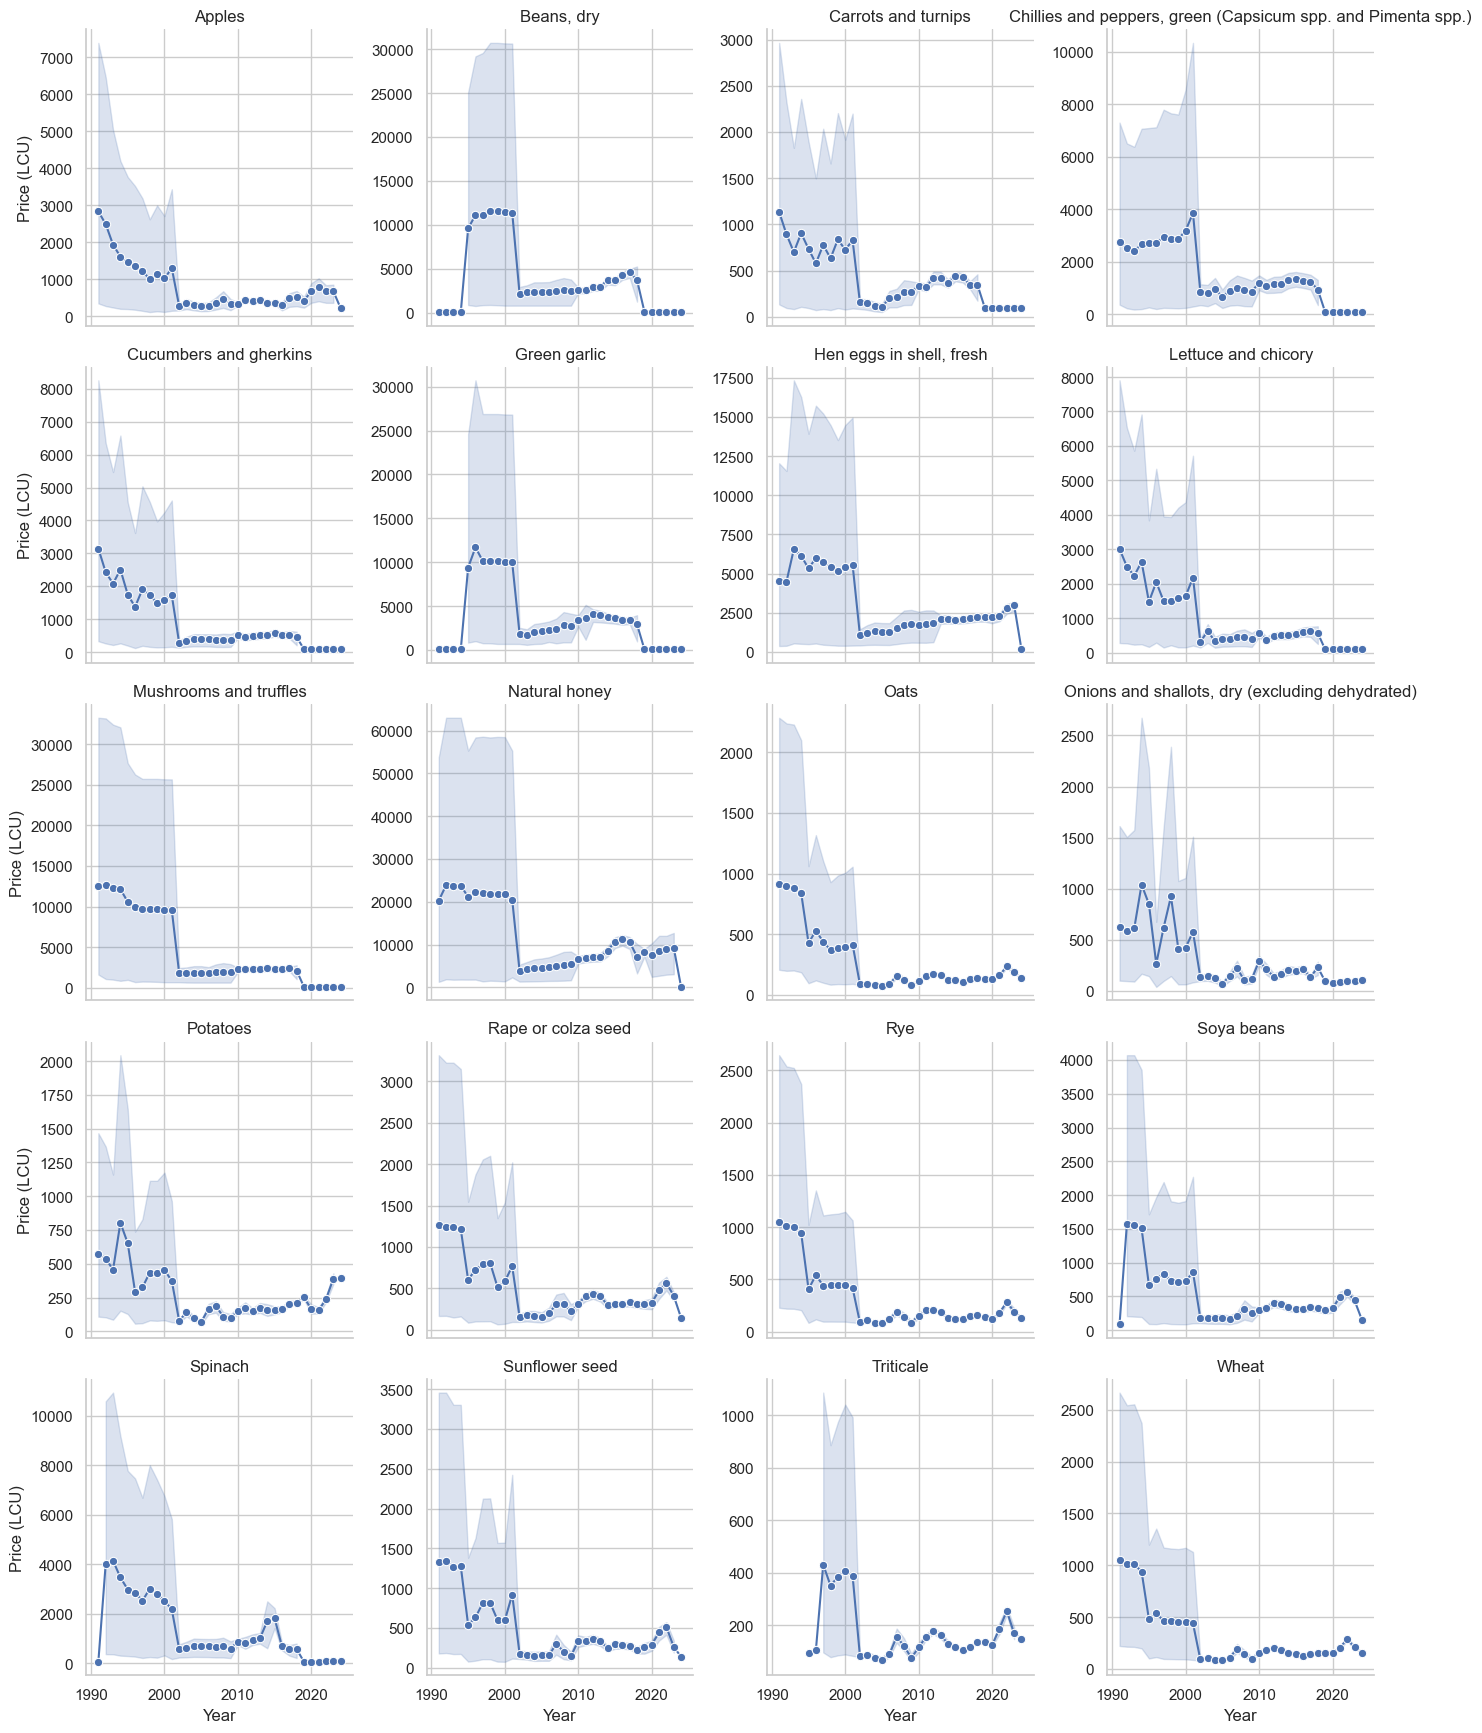

In [16]:
# Create FacetGrid: one line plot per product
g = sns.FacetGrid(filtered_df, col="Item", col_wrap=4, height=3.5, sharey=False)

# Draw lineplots in each subplot
g.map_dataframe(sns.lineplot, x="Year", y="Value", marker="o")

# Improve layout
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Price (LCU)")
g.tight_layout()

# Save to visuals folder
g.savefig("../visuals/producer_price_faceted_top20.png", dpi=300)

plt.show()


In [17]:
filtered_df = filtered_df.copy()  # just in case
filtered_df["Normalized"] = (
    filtered_df.groupby("Item")["Value"]
    .transform(lambda x: (x - x.min()) / (x.max() - x.min()))
)


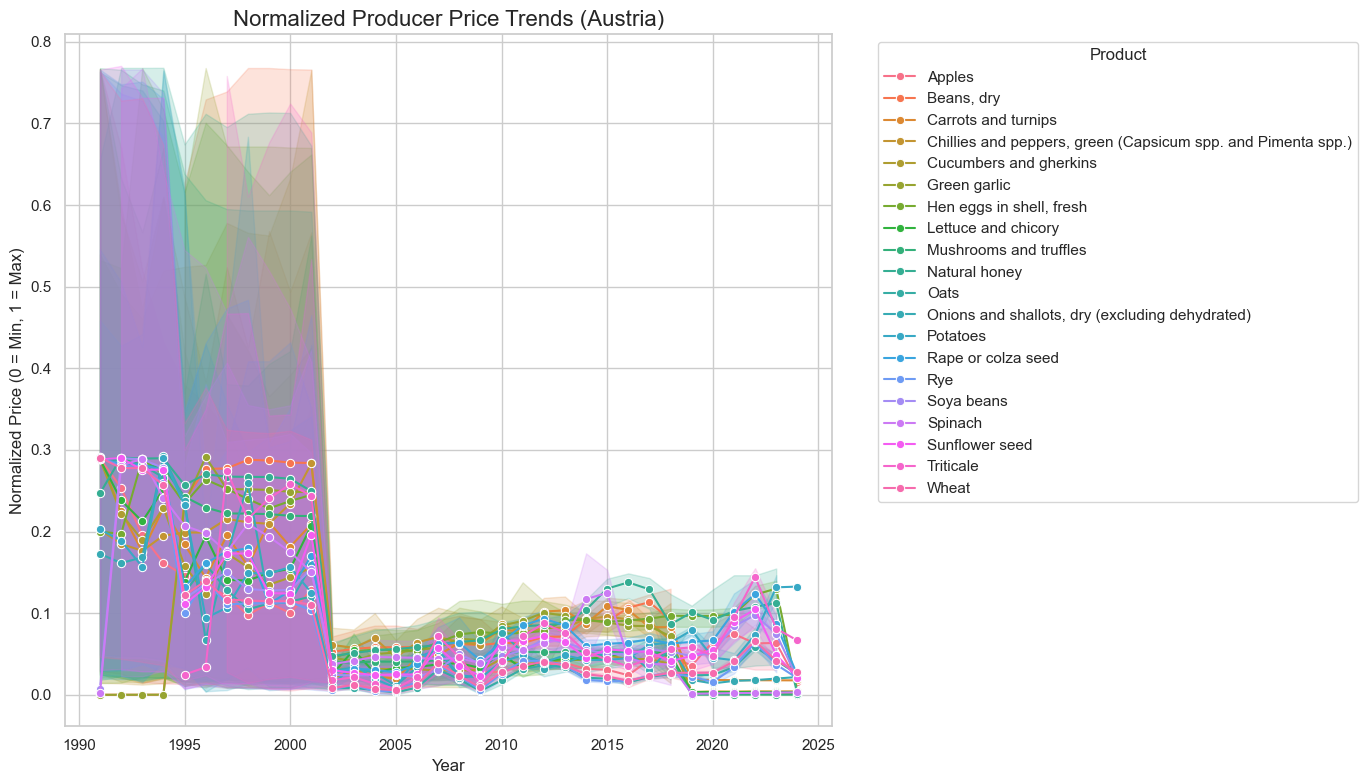

In [18]:
plt.figure(figsize=(14, 8))

# Plot line chart with markers
sns.lineplot(
    data=filtered_df,
    x="Year",
    y="Normalized",
    hue="Item",
    marker="o"
)

plt.title("Normalized Producer Price Trends (Austria)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Normalized Price (0 = Min, 1 = Max)")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save plot to visuals folder
plt.savefig("../visuals/normalized_producer_price_trends.png", dpi=300)

plt.show()


In [19]:
print(filtered_df["Normalized"].min(), filtered_df["Normalized"].max())


0.0 1.0


In [21]:
producer_df["Year"].value_counts().sort_index()





Year
1991    202
1992    208
1993    217
1994    220
1995    237
1996    232
1997    235
1998    233
1999    233
2000    242
2001    243
2002    241
2003    242
2004    254
2005    245
2006    248
2007    245
2008    242
2009    248
2010    496
2011    487
2012    500
2013    531
2014    526
2015    541
2016    503
2017    478
2018    333
2019    284
2020    264
2021    269
2022    297
2023    305
2024     92
Name: count, dtype: int64

In [ ]:
producer_df["Year"].value_counts().mean()


In [28]:
# Convert 'Year' to int just in case
filtered_df["Year"] = filtered_df["Year"].astype(int)

# Now average across all items, per year
yearly_producer = filtered_df.groupby("Year")["Normalized"].mean().reset_index()

# Done! Now yearly_producer is ready for comparison
yearly_producer.head()
yearly_consumer = pd.read_csv("normalized_consumer_prices.csv")
yearly_producer.to_csv("normalized_producer_prices1.csv", index=False)


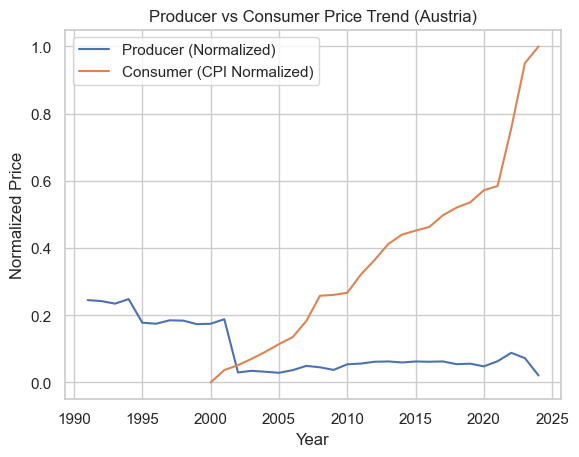

In [29]:
plt.plot(yearly_producer["Year"], yearly_producer["Normalized"], label="Producer (Normalized)")
plt.plot(yearly_consumer["Year"], yearly_consumer["Normalized"], label="Consumer (CPI Normalized)")

plt.title("Producer vs Consumer Price Trend (Austria)")
plt.xlabel("Year")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()
